In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import graphviz
from plotnine import *
import scipy.stats as sps
from sklearn import preprocessing
import sklearn.metrics as skm
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
warnings.simplefilter(action="ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV 

In [2]:
warrenty = pd.read_excel('/Users/anushbharathwaj/Desktop/Datascience set connect/RAC/warranty_rev1.xlsx')
warrenty

,Claim No,ASC Name,ASC ID,Customer /Vehicle Make,Zone,Town,Product family,Part Number,Description,slno,...,QA Assessment - Customer,Claim Entered,Quality Approved Date,price1,price2,price3,price4,price5,Total Price,After Sale Period - MIS
0,WILNIIIRC,Chopra Sales & Service,450250,Tata Motors Limited -TML,North,North West Delhi,Air Dryer,4611000770,Air Dryer,LA050721,...,Part Found OK - NFF,2022-11-04 00:00:00,2022-01-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,7
1,WILL4T6S5,HERITAGE AUTO EXPERTS,450490,Tata Motors Limited -TML,West,Pune,Dual Brake Valve,4611000080,Dual Brake Valve with Spout,1A191020,...,NaN,2022-01-04 00:00:00,2022-08-04 00:00:00,111.1,0.0,0.0,0.0,0.0,111.1,3
2,WILNMQAQH,VIKASH AIR PRESSURE,450225,Volvo Eicher - VECV,North,Gurgaon,Dual Brake Valve,4611001270,Foot Brake Valve,1B020921,...,NaN,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,5
3,WILE48ZVN,VIKASH AIR PRESSURE,450225,Volvo Eicher - VECV,North,Gurgaon,Dual Brake Valve,4611001270,Foot Brake Valve,1A02032,...,NaN,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,9
4,WILYNI23A,Arvind Motors Pvt Ltd,451055,Tata Motors Limited -TML,South,Dakshina Kannada,Dual Brake Valve,4611000770,Dual Brake Valve,NaN,...,NaN,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7327,WILDIZZ5Y,RAVI BOOSTER WORKS,450975,Ashok Leyland,South,Tiruvallur,Compressor,9121700040,Compressor,16/03/2022,...,Ashok Leyland,2022-05-09 00:00:00,20/09/2022,85.9,275.0,0.0,0.0,0.0,360.9,3
7328,WILV84JE5,BUDHA DIESEL,450761,Volvo Eicher - VECV,East,Gaya,Compressor,9129700590,160 cc with side PR Compressor,9490121,...,Others,2022-05-09 00:00:00,NaN,90.6,350.0,0.0,0.0,0.0,440.6,18
7329,WILBECHA3,DIESEL INDIA,451000,Ashok Leyland,North,Jodhpur,Air Processing Unit - APU,9325001960,APU,1B160320,...,Ashok Leyland,2022-05-09 00:00:00,16/09/2022,0.0,0.0,0.0,0.0,0.0,0.0,21
7330,WILYTNOLJ,Automotive Seva Point,450037,Tata Motors Limited -TML,West,Aurangabad,Clutch Servo,9700516530,Clutch Servo,61021,...,TATA Motors,2022-05-09 00:00:00,16/09/2022,102.3,0.0,0.0,0.0,0.0,102.3,7


In [3]:
[f"{i} is ----- {warrenty[i].dtype}" for i in warrenty.columns]

['Claim No is ----- object',
 'ASC Name is ----- object',
 'ASC ID is ----- int64',
 'Customer /Vehicle Make is ----- object',
 'Zone is ----- object',
 'Town is ----- object',
 'Product family is ----- object',
 'Part Number is ----- object',
 'Description is ----- object',
 'slno is ----- object',
 'wabcosite is ----- object',
 'Quantity is ----- float64',
 'Chasis No is ----- object',
 'ENG No is ----- object',
 'kms covered is ----- float64',
 'hrs covered is ----- object',
 'Registration Number is ----- object',
 'Date of Sale is ----- object',
 'Date of Failure is ----- object',
 'Customer Complaint is ----- object',
 'failure mode is ----- object',
 'Observation1 is ----- object',
 'Observation2 is ----- object',
 'Action Taken by ASC is ----- object',
 'Servicepart 1 is ----- object',
 'Q1 is ----- float64',
 'Servicepart 2 is ----- object',
 'Q2 is ----- float64',
 'Servicepart 3 is ----- object',
 'Q3 is ----- float64',
 'Servicepart 4 is ----- object',
 'Q4 is ----- float64'

In [4]:
df = warrenty.drop(['Claim No', 
               'ASC ID',
              'Part Number',
              'Description',
              'slno',
              'Chasis No',
              'ENG No',
            'Registration Number',
               'Customer Complaint',
               'Observation1',
               'Observation2',
               'Action Taken by ASC',
               'Servicepart 1',
               'Servicepart 2',
               'Servicepart 3',
               'Servicepart 4',
               'Servicepart 5',
               'QA Assessment - Customer',
               
              ], axis=1)

In [5]:
df.head()

,ASC Name,Customer /Vehicle Make,Zone,Town,Product family,wabcosite,Quantity,kms covered,hrs covered,Date of Sale,...,Q5,Claim Entered,Quality Approved Date,price1,price2,price3,price4,price5,Total Price,After Sale Period - MIS
0,Chopra Sales & Service,Tata Motors Limited -TML,North,North West Delhi,Air Dryer,WINC-124,1.0,23590.0,NaN,15/09/2021,...,0,2022-11-04 00:00:00,2022-01-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,7
1,HERITAGE AUTO EXPERTS,Tata Motors Limited -TML,West,Pune,Dual Brake Valve,WINC-124,1.0,37412.0,NaN,30/01/2022,...,0,2022-01-04 00:00:00,2022-08-04 00:00:00,111.1,0.0,0.0,0.0,0.0,111.1,3
2,VIKASH AIR PRESSURE,Volvo Eicher - VECV,North,Gurgaon,Dual Brake Valve,WINC-124,1.0,38060.0,NaN,30/10/2021,...,0,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,5
3,VIKASH AIR PRESSURE,Volvo Eicher - VECV,North,Gurgaon,Dual Brake Valve,Select,1.0,40500.0,NaN,29/06/2021,...,0,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,9
4,Arvind Motors Pvt Ltd,Tata Motors Limited -TML,South,Dakshina Kannada,Dual Brake Valve,Select,1.0,21844.0,NaN,2021-11-06 00:00:00,...,0,2022-01-04 00:00:00,2022-08-04 00:00:00,65.4,0.0,0.0,0.0,0.0,65.4,10


In [6]:
[f"{i} is ----- {df[i].dtype}" for i in df.columns]

['ASC Name is ----- object',
 'Customer /Vehicle Make is ----- object',
 'Zone is ----- object',
 'Town is ----- object',
 'Product family is ----- object',
 'wabcosite is ----- object',
 'Quantity is ----- float64',
 'kms covered is ----- float64',
 'hrs covered is ----- object',
 'Date of Sale is ----- object',
 'Date of Failure is ----- object',
 'failure mode is ----- object',
 'Q1 is ----- float64',
 'Q2 is ----- float64',
 'Q3 is ----- float64',
 'Q4 is ----- float64',
 'Q5 is ----- int64',
 'Claim Entered is ----- object',
 'Quality Approved Date is ----- object',
 'price1 is ----- float64',
 'price2 is ----- float64',
 'price3 is ----- float64',
 'price4 is ----- float64',
 'price5 is ----- float64',
 'Total Price is ----- float64',
 'After Sale Period - MIS is ----- int64']

   ## EXPLORATORY DATA ANALYSIS ##

In [7]:
list(df.columns)

['ASC Name',
 'Customer /Vehicle Make',
 'Zone',
 'Town',
 'Product family',
 'wabcosite',
 'Quantity',
 'kms covered',
 'hrs covered',
 'Date of Sale',
 'Date of Failure',
 'failure mode',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Claim Entered',
 'Quality Approved Date',
 'price1',
 'price2',
 'price3',
 'price4',
 'price5',
 'Total Price',
 'After Sale Period - MIS']

In [8]:
df.shape

(7332, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332 entries, 0 to 7331
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ASC Name                 7332 non-null   object 
 1   Customer /Vehicle Make   7332 non-null   object 
 2   Zone                     7332 non-null   object 
 3   Town                     7331 non-null   object 
 4   Product family           7332 non-null   object 
 5   wabcosite                7332 non-null   object 
 6   Quantity                 7320 non-null   float64
 7   kms covered              7332 non-null   float64
 8   hrs covered              58 non-null     object 
 9   Date of Sale             7332 non-null   object 
 10  Date of Failure          7332 non-null   object 
 11  failure mode             7332 non-null   object 
 12  Q1                       7327 non-null   float64
 13  Q2                       7330 non-null   float64
 14  Q3                      

In [10]:
df.isnull().sum()

ASC Name                      0
Customer /Vehicle Make        0
Zone                          0
Town                          1
Product family                0
wabcosite                     0
Quantity                     12
kms covered                   0
hrs covered                7274
Date of Sale                  0
Date of Failure               0
failure mode                  0
Q1                            5
Q2                            2
Q3                            3
Q4                            1
Q5                            0
Claim Entered                 0
Quality Approved Date       741
price1                        0
price2                        0
price3                        0
price4                        0
price5                        0
Total Price                   0
After Sale Period - MIS       0
dtype: int64

In [11]:
mean1 = df['Quantity'].mean()
mean1

1.1564207650273224

In [12]:
df['Quantity'].replace(np.nan,mean1,inplace = True)

In [13]:
mode1 = df['Town'].mode().values[0]
mode1

'Mumbai'

In [14]:
df['Town'].replace(np.nan,mean1,inplace = True)

In [15]:
mode2 = df['hrs covered'].mode().values[0]
mode2

0

In [16]:
df['hrs covered'].replace(np.nan,mean1,inplace = True)

In [17]:
mode3 = df['Quality Approved Date'].mode().values[0]
mode3

numpy.datetime64('2022-04-08T00:00:00.000000000')

In [18]:
df['Quality Approved Date'].replace(np.nan,mean1,inplace = True)

In [19]:
mean2 = df['Q1'].mean()
mean2

0.7604749556435103

In [20]:
df['Q1'].replace(np.nan,mean1,inplace = True)

In [21]:
mean3 = df['Q2'].mean()
mean3

0.10982264665757162

In [22]:
df['Q2'].replace(np.nan,mean1,inplace = True)

In [23]:
mean4 = df['Q3'].mean()
mean4

0.025787965616045846

In [24]:
df['Q3'].replace(np.nan,mean1,inplace = True)

In [25]:
mean5 = df['Q4'].mean()
mean5

0.03737552857727459

In [26]:
df['Q4'].replace(np.nan,mean1,inplace = True)

In [27]:
df.isnull().sum()

ASC Name                   0
Customer /Vehicle Make     0
Zone                       0
Town                       0
Product family             0
wabcosite                  0
Quantity                   0
kms covered                0
hrs covered                0
Date of Sale               0
Date of Failure            0
failure mode               0
Q1                         0
Q2                         0
Q3                         0
Q4                         0
Q5                         0
Claim Entered              0
Quality Approved Date      0
price1                     0
price2                     0
price3                     0
price4                     0
price5                     0
Total Price                0
After Sale Period - MIS    0
dtype: int64

In [28]:
duplicate = df.duplicated()
print(duplicate.sum())

180


In [29]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<AxesSubplot:>

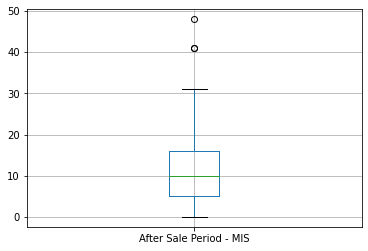

In [30]:
df.boxplot(column = ['After Sale Period - MIS'])

<AxesSubplot:>

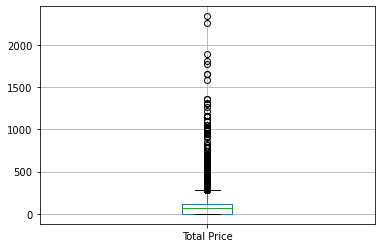

In [31]:
df.boxplot(column = ['Total Price'])

<AxesSubplot:>

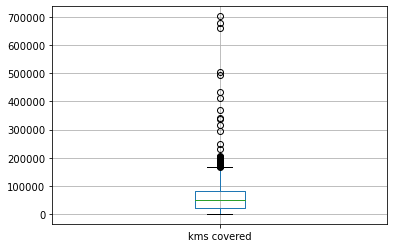

In [32]:
df.boxplot(column = ['kms covered'])

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range,upper_range

low_aftersale,high_aftersale = remove_outlier(df['After Sale Period - MIS'])
df['After Sale Period - MIS'] = np.where(df['After Sale Period - MIS']>high_aftersale,high_aftersale,df['After Sale Period - MIS'])
df['After Sale Period - MIS'] = np.where(df['After Sale Period - MIS']<low_aftersale,low_aftersale,df['After Sale Period - MIS'])

<AxesSubplot:>

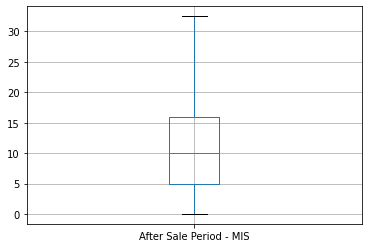

In [34]:
df.boxplot(column=["After Sale Period - MIS"])

<AxesSubplot:>

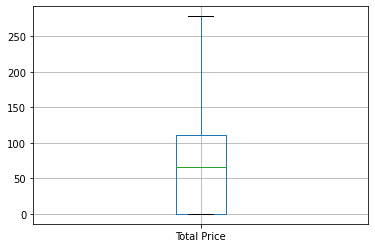

In [35]:
low_aftersale,high_aftersale = remove_outlier(df['Total Price'])
df['Total Price'] = np.where(df['Total Price']>high_aftersale,high_aftersale,df['Total Price'])
df['Total Price'] = np.where(df['Total Price']<low_aftersale,low_aftersale,df['Total Price'])

df.boxplot(column=["Total Price"])

<AxesSubplot:>

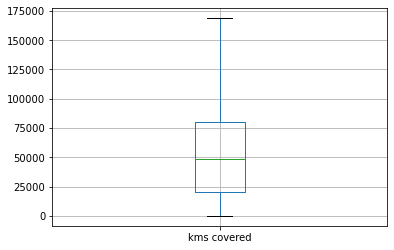

In [36]:
low_aftersale,high_aftersale = remove_outlier(df['kms covered'])
df['kms covered'] = np.where(df['kms covered']>high_aftersale,high_aftersale,df['kms covered'])
df['kms covered'] = np.where(df['kms covered']<low_aftersale,low_aftersale,df['kms covered'])

df.boxplot(column=["kms covered"])

Text(0, 0.5, 'Frequency')

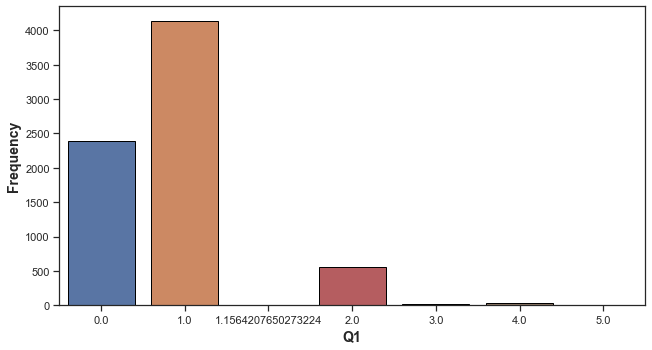

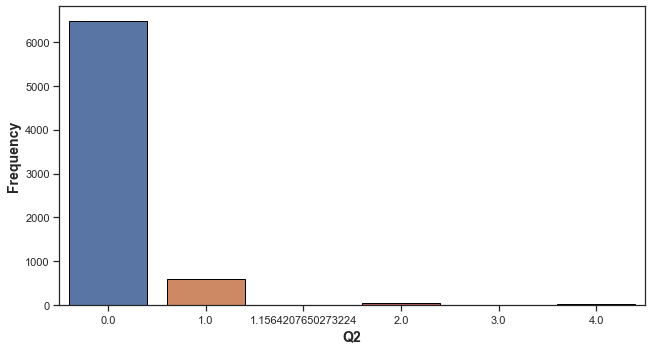

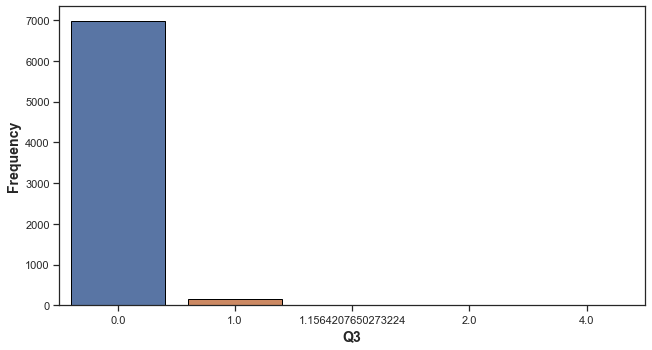

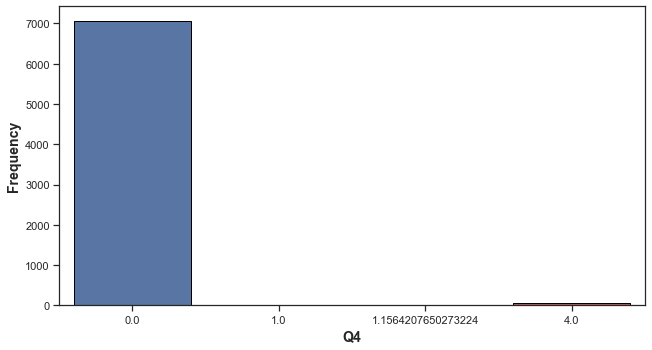

In [37]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(10.5, 5.5))
sns.countplot(x='Q1', data=df, edgecolor='black')
plt.xlabel('Q1', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


plt.figure(figsize=(10.5, 5.5))
sns.countplot(x='Q2', data=df, edgecolor='black')
plt.xlabel('Q2', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


plt.figure(figsize=(10.5, 5.5))
sns.countplot(x='Q3', data=df, edgecolor='black')
plt.xlabel('Q3', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.figure(figsize=(10.5, 5.5))
sns.countplot(x='Q4', data=df, edgecolor='black')
plt.xlabel('Q4', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

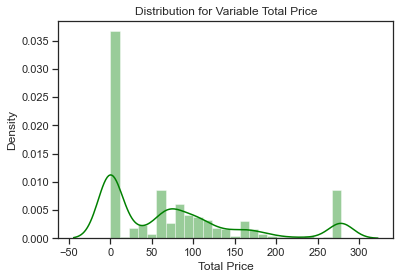

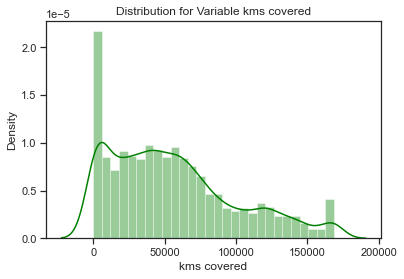

In [38]:
for i in ['Total Price', 'kms covered']:
    
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [39]:
df['Total Price'] = np.log1p(df['Total Price'])
df['kms covered'] = np.log1p(df['kms covered'])

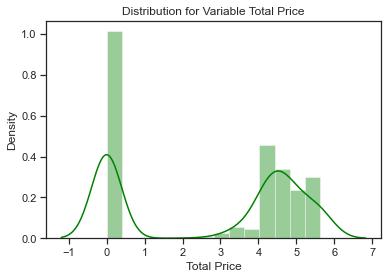

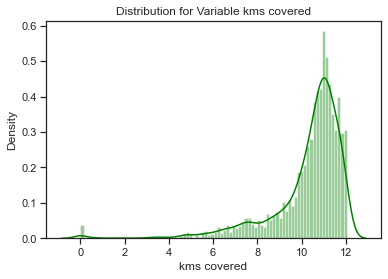

In [40]:
for i in ['Total Price', 'kms covered']:
    
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

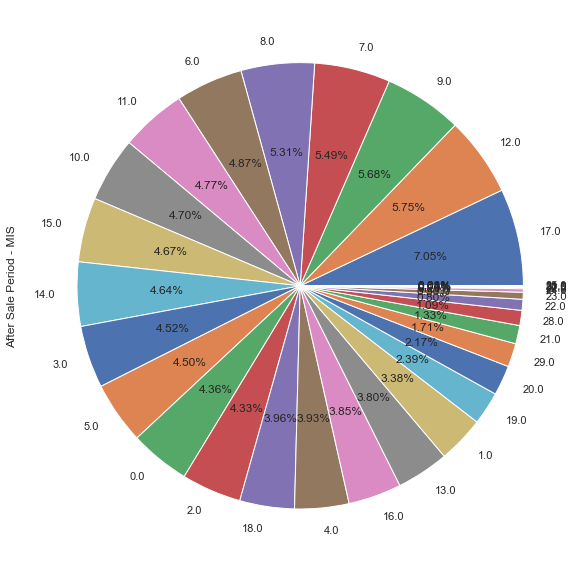

In [41]:
df['After Sale Period - MIS'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [10,20])
plt.show()

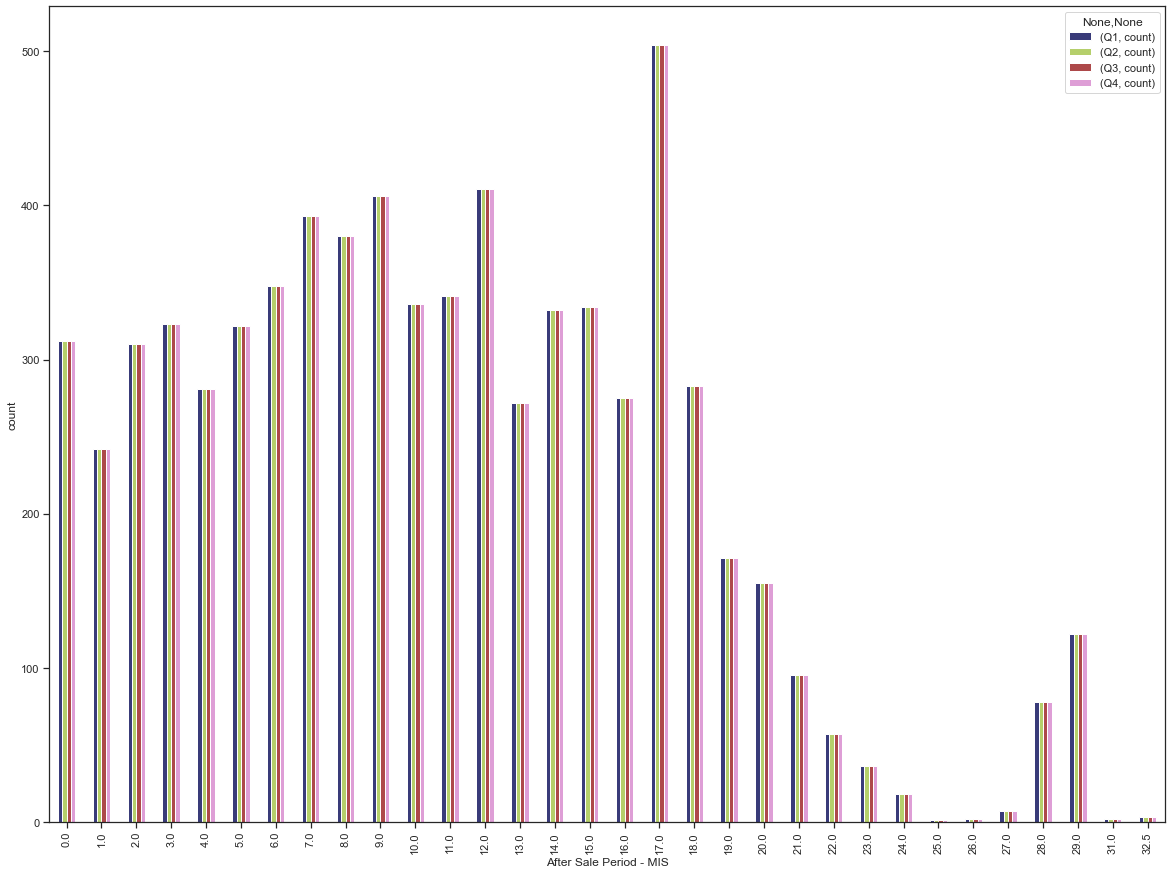

In [42]:
df.groupby(['After Sale Period - MIS']).agg({'Q1' : ['count'],
                                      'Q2' :['count'],
                                      'Q3' : ['count'],
                                    'Q4' :['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [20,15])
plt.ylabel('count')
plt.show()

In [43]:
index = df[ (df['Zone'] == 'NORTH') | (df['Zone'] == 'SOUTH')| (df['Zone'] == 'WEST') ].index
df.drop(index , inplace=True)

<AxesSubplot:xlabel='count', ylabel='Zone'>

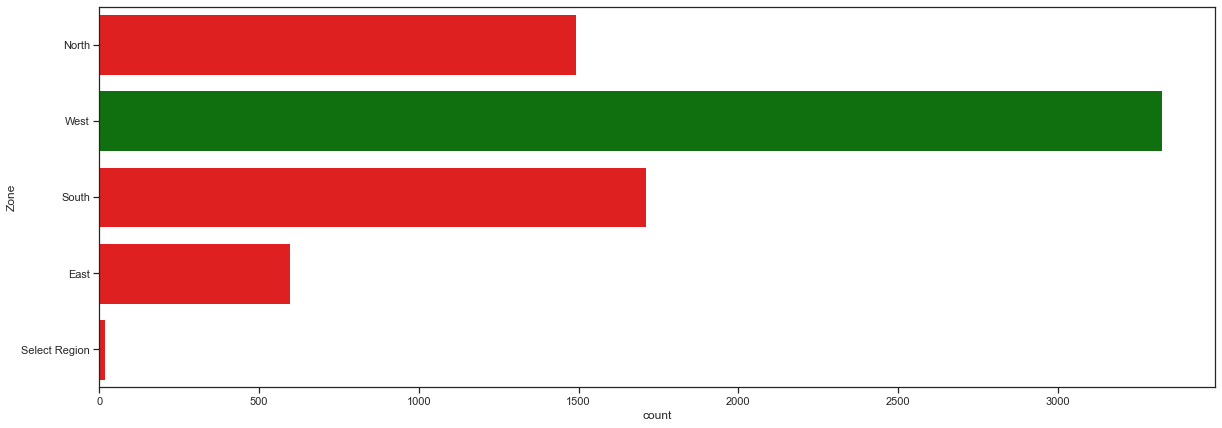

In [44]:
fig = plt.figure(figsize=(20,7))
cols = ['red' if (x < max(df.Zone)) else 'green' for x in df.Zone]
sns.countplot(y='Zone', data=df,palette=cols)

In [45]:
df.Zone.value_counts()

West             3328
South            1711
North            1493
East              597
Select Region      17
Name: Zone, dtype: int64

In [46]:
df.Town.value_counts()

Mumbai                 1033
Thane                   373
North West Delhi        303
Salem                   275
Raigarh(MH)             272
                       ... 
Warangal                  1
Rajsamand                 1
Mandi                     1
Dhanbad                   1
Seraikela-kharsawan       1
Name: Town, Length: 240, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Town'>

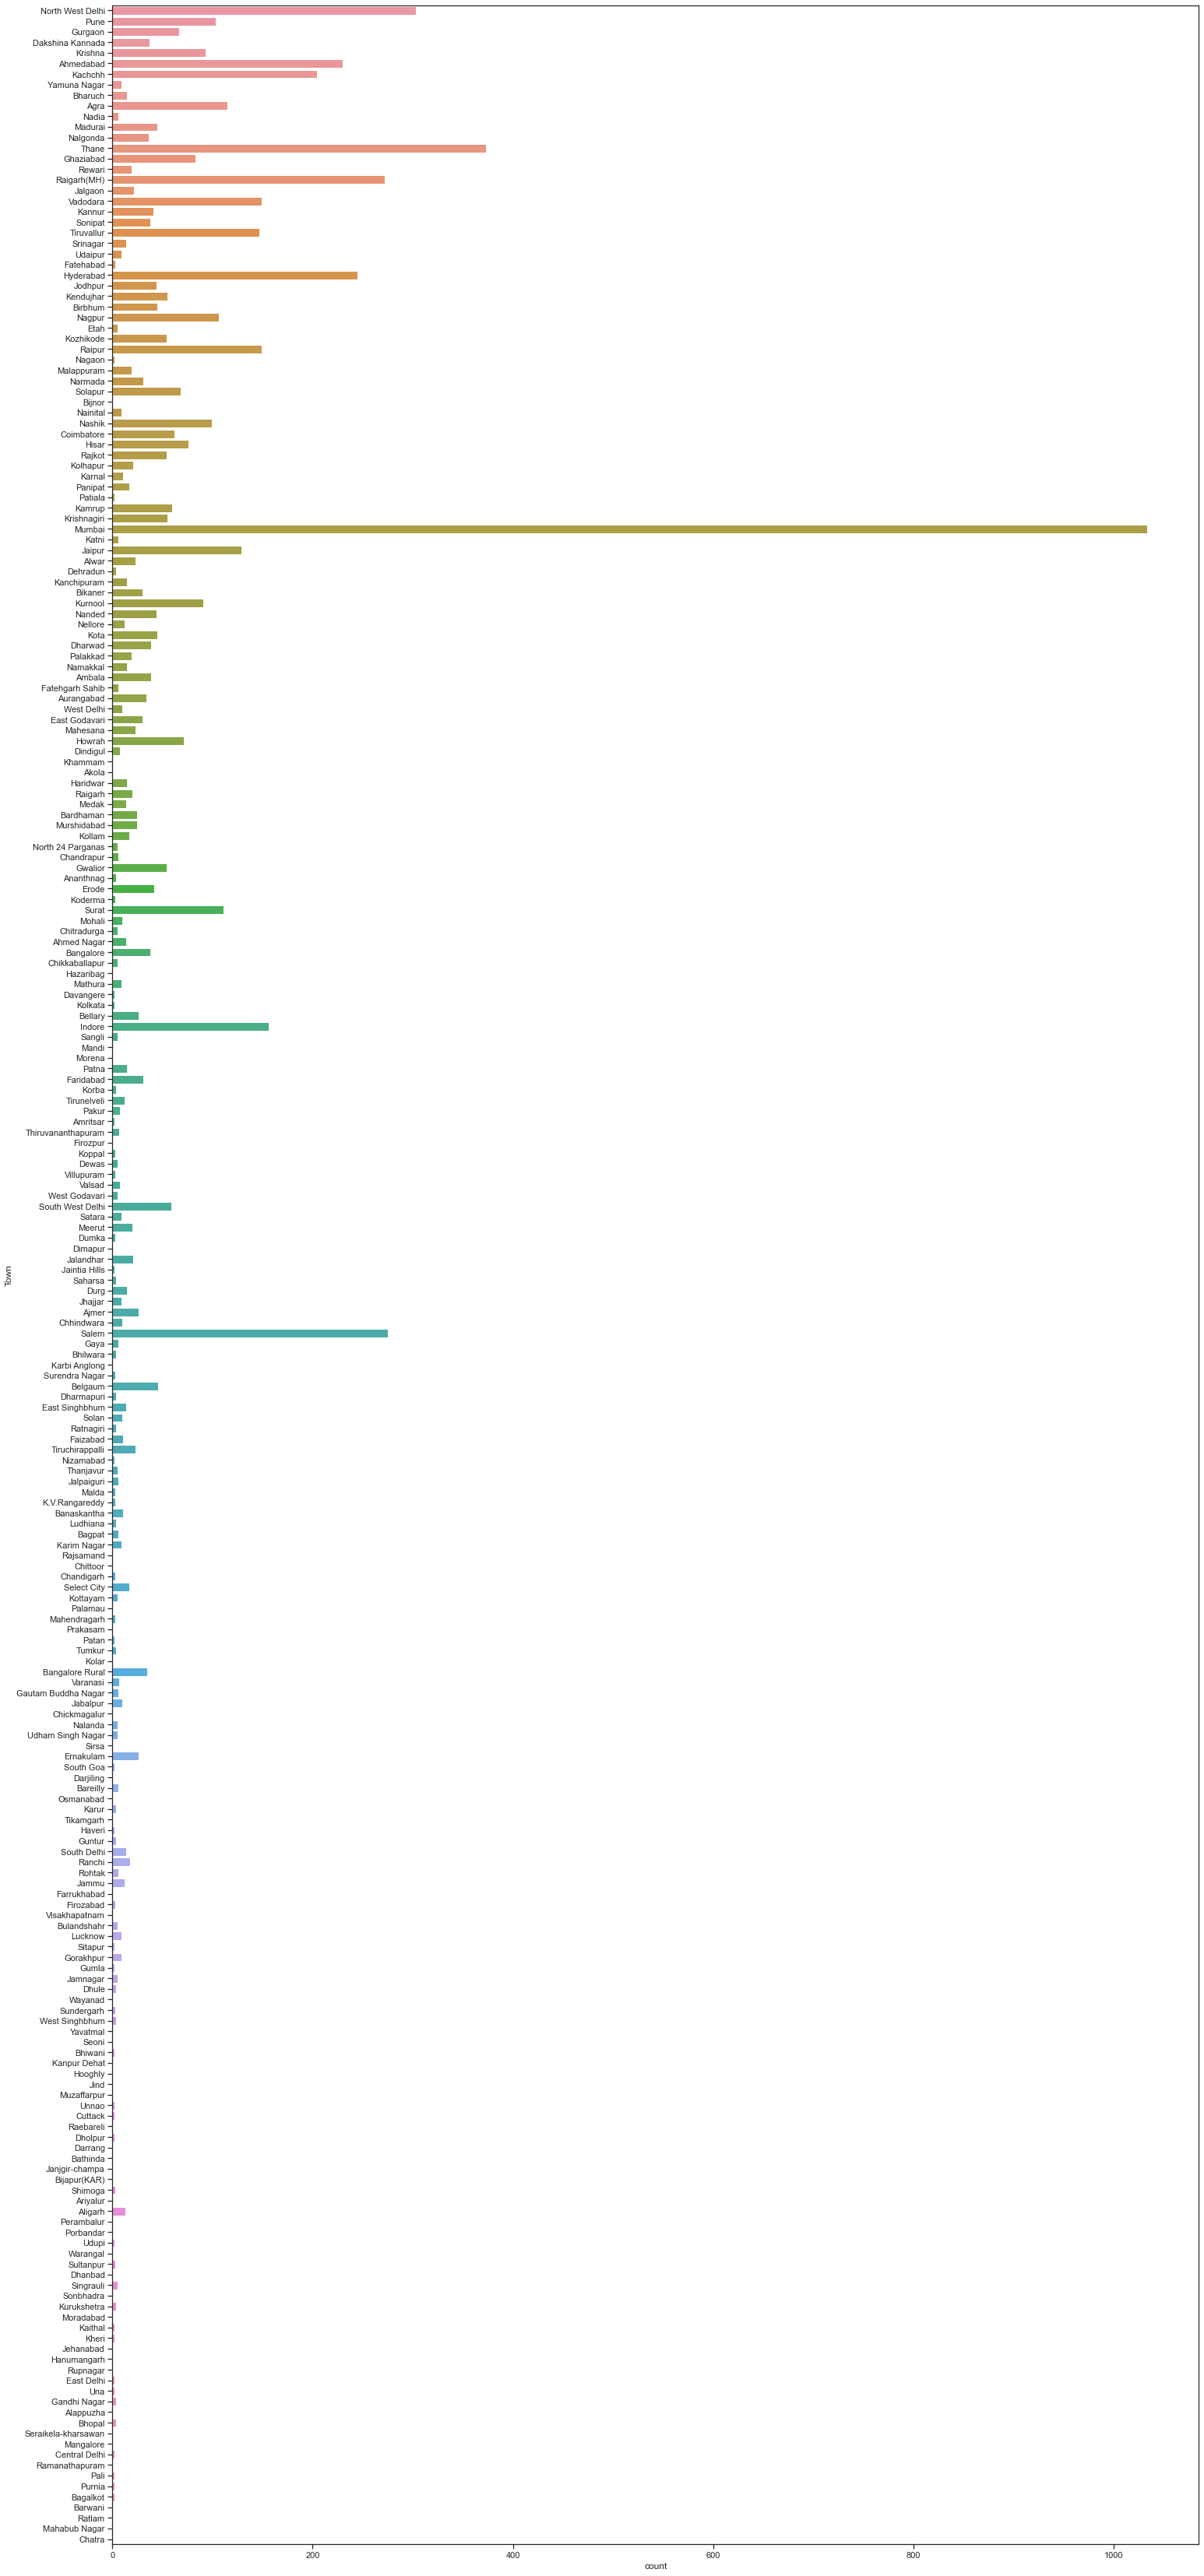

In [47]:
fig = plt.figure(figsize=(25,60))
sns.countplot(y='Town', data=df)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

In [49]:
fp = r'/Users/anushbharathwaj/Downloads/Maps_with_python-master/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [50]:
merged = map_df.set_index('st_nm').join(df.set_index('Town'))
merged['Count'] = df.Town.value_counts().replace(np.nan, 0)
merged.head()

,id,geometry,ASC Name,Customer /Vehicle Make,Zone,Product family,wabcosite,Quantity,kms covered,hrs covered,...,Claim Entered,Quality Approved Date,price1,price2,price3,price4,price5,Total Price,After Sale Period - MIS,Count
Andaman and Nicobar Islands,NaN,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,NaN,"POLYGON ((81.10545 17.82313, 81.39342 17.81473...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arunachal Pradesh,NaN,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assam,NaN,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bihar,NaN,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

In [52]:
india_states = json.load(open("/Users/anushbharathwaj/Downloads/states_india.geojson", "r"))
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

In [53]:
df['Customer /Vehicle Make'].value_counts()

Tata Motors Limited -TML             3671
Ashok Leyland                        1168
Volvo Eicher - VECV                  1084
Mahindra Trucks & Buses - MTBD        718
BEST CNG BUS - BSIV                   202
BHARAT BENZ - DICV                    183
JBM Groups                             49
Trailer Customers                      34
Swaraj Mazda Limited - SML ISSUZU      29
Action Construction Equipment Ltd       4
Force Motors                            2
ISUZU                                   1
Cater Pillar - CAT                      1
Name: Customer /Vehicle Make, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Customer /Vehicle Make'>

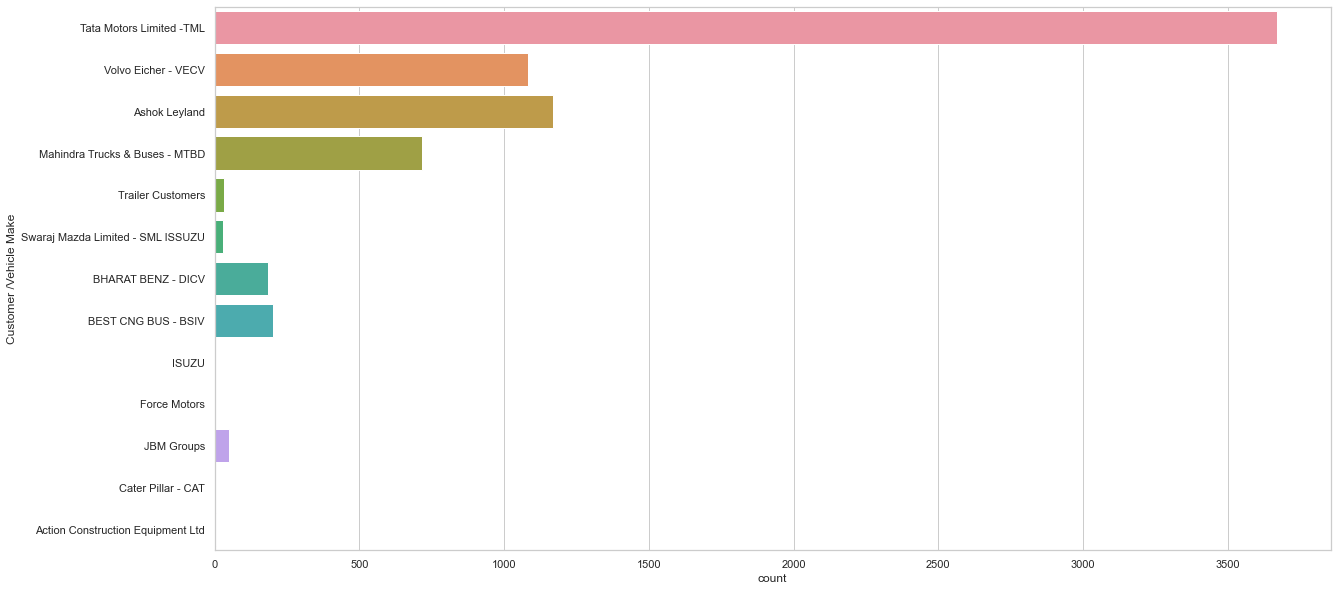

In [54]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y='Customer /Vehicle Make', data=df)

In [79]:
table = pd.pivot_table(df, index =['Customer /Vehicle Make','Zone'], values=['Quantity'],aggfunc = 'count',fill_value = '')
table

Quantity
Customer /Vehicle Make            Zone                   
Action Construction Equipment Ltd South                 1
                                  West                  3
Ashok Leyland                     East                101
                                  North               200
                                  South               585
                                  West                282
BEST CNG BUS - BSIV               West                202
BHARAT BENZ - DICV                East                 27
                                  North                46
                                  Select Region        16
                                  South                67
                                  West                 27
Cater Pillar - CAT                East                  1
Force Motors                      South                 1
                                  West                  1
ISUZU                             North                 1
JBM Groups                        North                45
                                  South                 2
                                  West                  2
Mahindra Trucks & Buses - MTBD    East                 42
                                  North               166
                                  South               108
                                  West                402
Swaraj Mazda Limited - SML ISSUZU East                  3
                                  North                 9
                                  South                13
                                  West                  4
Tata Motors Limited -TML          East                379
                                  North               781
                                  Select Region         1
                                  South               530
                                  West               1980
Trailer Customers                 East                  3
                                  North                16
                                  West                 15
Volvo Eicher - VECV               East                 41
                                  North               229
                                  South               404
                                  West                410

<AxesSubplot:xlabel='Customer /Vehicle Make,Zone'>

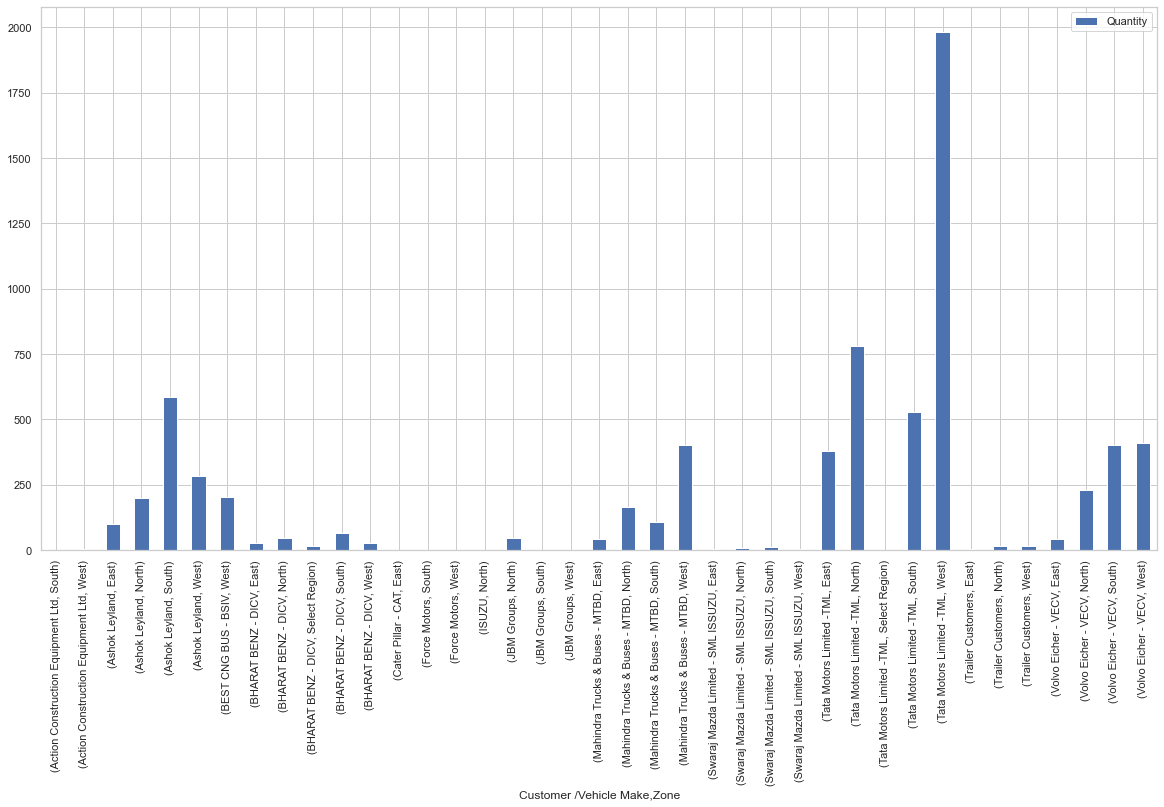

In [81]:
table.plot(kind='bar',figsize=(20,10))

In [56]:
table1 = pd.pivot_table(df, index =['Customer /Vehicle Make'], columns = ['failure mode'], values=['Product family'],aggfunc = 'count',fill_value = '')
table1

Product family                 \
failure mode                      Back Pressure Not OK Brake grabbing   
Customer /Vehicle Make                                                  
Action Construction Equipment Ltd                                       
Ashok Leyland                                                       2   
BEST CNG BUS - BSIV                                                     
BHARAT BENZ - DICV                                  10                  
Cater Pillar - CAT                                                      
Force Motors                                                            
ISUZU                                                                   
JBM Groups                                                              
Mahindra Trucks & Buses - MTBD                                      1   
Swaraj Mazda Limited - SML ISSUZU                                       
Tata Motors Limited -TML                                           13   
Trailer Customers                                                       
Volvo Eicher - VECV                                                 6   

                                                                           \
failure mode                      Clutch hard Coolant Mixup with delivery   
Customer /Vehicle Make                                                      
Action Construction Equipment Ltd                                           
Ashok Leyland                              17                           7   
BEST CNG BUS - BSIV                                                         
BHARAT BENZ - DICV                                                          
Cater Pillar - CAT                                                          
Force Motors                                                                
ISUZU                                                                       
JBM Groups                                                                  
Mahindra Trucks & Buses - MTBD              9                           3   
Swaraj Mazda Limited - SML ISSUZU                                       1   
Tata Motors Limited -TML                   73                         144   
Trailer Customers                                                           
Volvo Eicher - VECV                         5                           6   

                                                          \
failure mode                      Cut-in Pressure Not OK   
Customer /Vehicle Make                                     
Action Construction Equipment Ltd                          
Ashok Leyland                                          1   
BEST CNG BUS - BSIV                                        
BHARAT BENZ - DICV                                         
Cater Pillar - CAT                                         
Force Motors                                               
ISUZU                                                      
JBM Groups                                                 
Mahindra Trucks & Buses - MTBD                         1   
Swaraj Mazda Limited - SML ISSUZU                          
Tata Motors Limited -TML                               6   
Trailer Customers                                          
Volvo Eicher - VECV                                        

                                                           \
failure mode                      Cut-out Pressure Not OK   
Customer /Vehicle Make                                      
Action Construction Equipment Ltd                           
Ashok Leyland                                           2   
BEST CNG BUS - BSIV                                         
BHARAT BENZ - DICV                                          
Cater Pillar - CAT                                          
Force Motors                                                
ISUZU                                                       
JBM Groups                                                  
Mahind

In [57]:
df['Product family'].value_counts()

Spring Brake Actuator - SBA                        1484
Dual Brake Valve                                   1199
Compressor                                          684
Clutch Servo                                        661
Relay Valve                                         504
Air Processing Unit - APU                           503
Solenoid Modulator Valve - 24V                      394
Brake Chamber                                       272
Drying and Distribution Unit - DDU                  241
Air Processing and Distribution Assembly - APDA     215
Quick Release Valve - QRV                           180
LACV - Lift Axle Control Valve                      135
LDV - Load Detection Valve                          123
Air dryer                                           102
Inversion Relay Valve - IRV                          85
Hand Control Valve - HCV                             69
Magnetic Valve                                       61
Trailer Control Valve - TCV                     

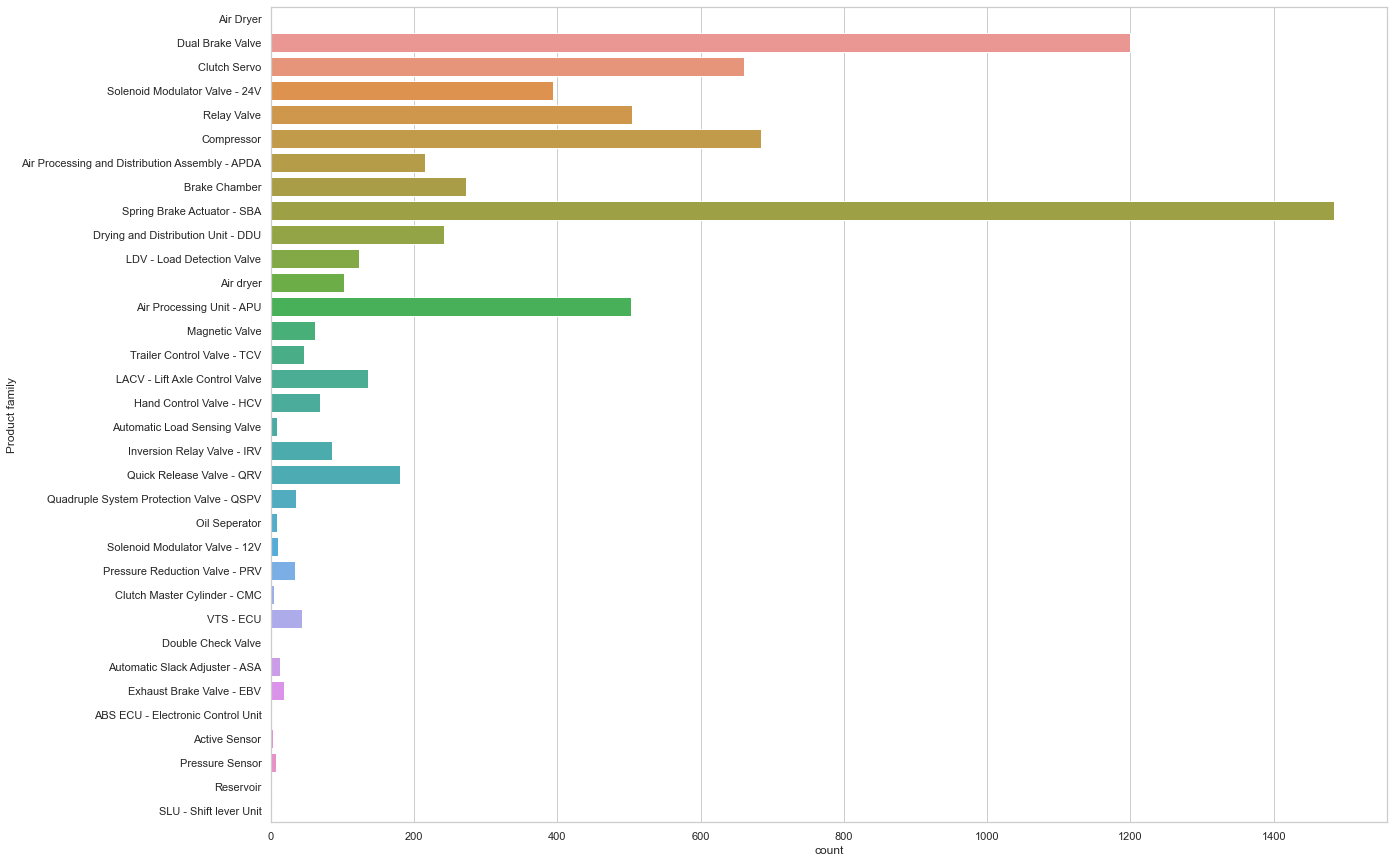

In [58]:
fig = plt.figure(figsize=(20,15))
a = sns.countplot(y='Product family', data=df)
plt.show()

fig = a.get_figure()
fig.savefig("out.png") 

In [59]:
df.Quantity.value_counts()

1.000000    6123
2.000000     950
4.000000      37
3.000000      25
1.156421      11
Name: Quantity, dtype: int64

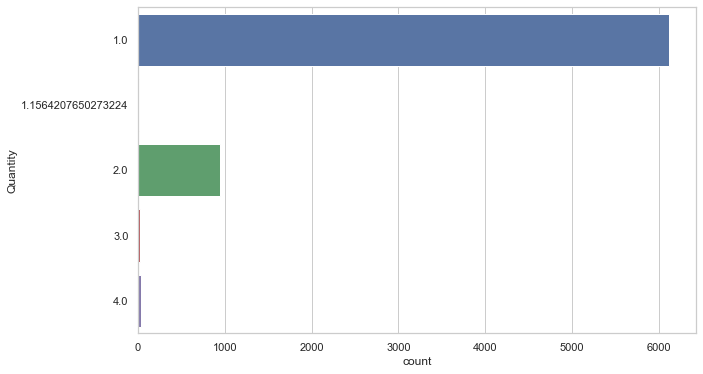

In [60]:
fig = plt.figure(figsize=(10,6))
sns.countplot(y='Quantity', data=df);

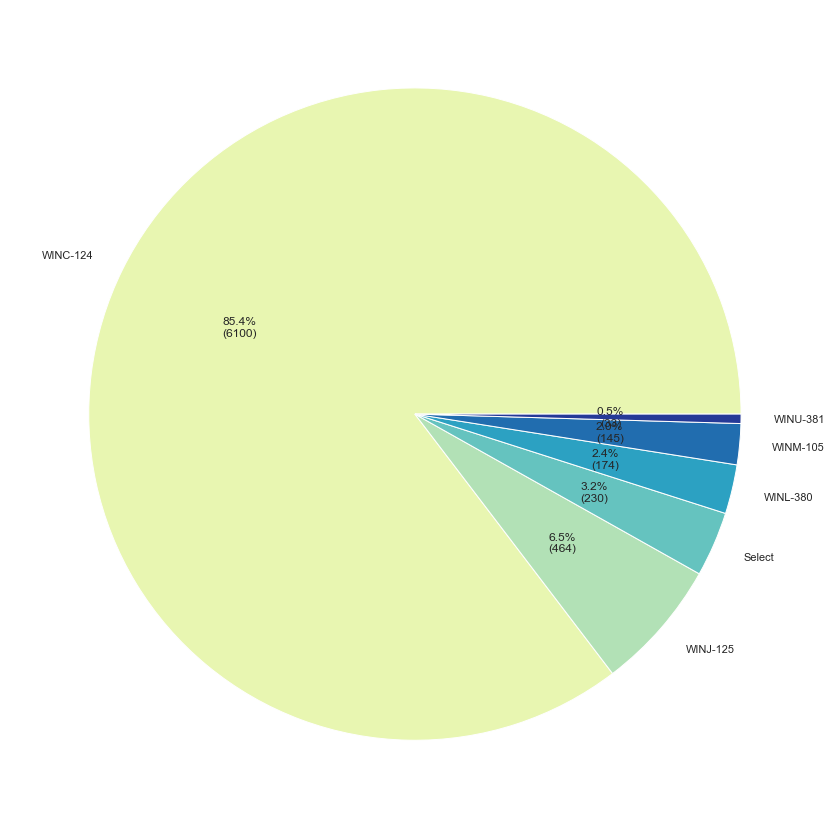

In [61]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
    

fig = plt.figure(figsize=(20,15))
keys = ['wabcosite - 124', 'wabcosite - 125', 'wabcosite - 380', 'wabcosite - 105', 'wabcosite - 381']
s = df['wabcosite'].value_counts()
palette_color = sns.color_palette('YlGnBu')
plt.pie(s,labels = s.index, colors=palette_color,autopct=autopct_format(s))
plt.show()

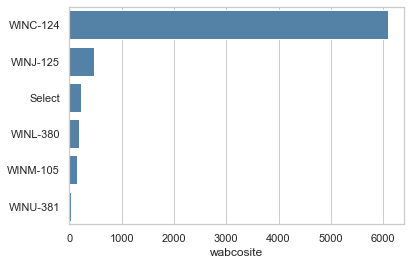

In [62]:
c =sns.barplot(x=s, y=s.index, color='steelblue')
fig = c.get_figure()
fig.savefig("c.png") 
plt.show()

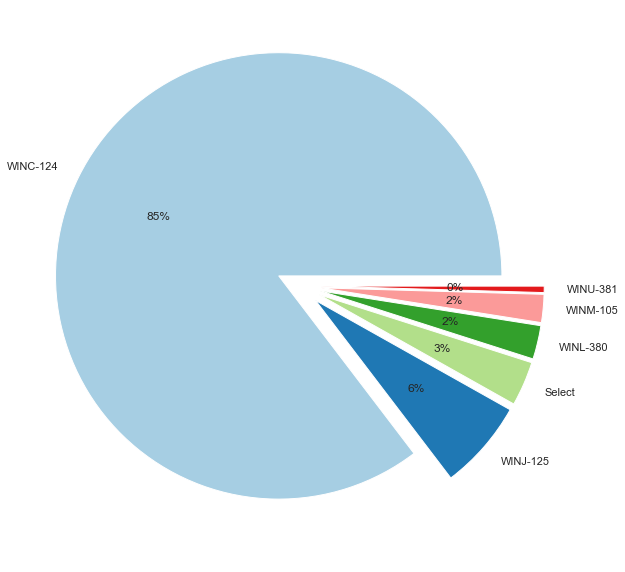

In [63]:
fig = plt.figure(figsize=(10,15))
explode = [0.1, 0.1, 0.1, 0.1, 0.1,0.1]
s = df['wabcosite'].value_counts()
palette_color = sns.color_palette('Paired')
b=plt.pie(s, labels=s.index, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  

fig.savefig("b.png") 
plt.show()

In [64]:
table1 = pd.pivot_table(df,index=['Customer /Vehicle Make','Product family'],values=['failure mode'],
               aggfunc='count')
table1

failure mode
Customer /Vehicle Make            Product family                                  
Action Construction Equipment Ltd Drying and Distribution Unit - DDU             1
                                  Hand Control Valve - HCV                       1
                                  LACV - Lift Axle Control Valve                 1
                                  Spring Brake Actuator - SBA                    1
Ashok Leyland                     Air Processing Unit - APU                     99
...                                                                            ...
Volvo Eicher - VECV               Solenoid Modulator Valve - 12V                 6
                                  Solenoid Modulator Valve - 24V                11
                                  Spring Brake Actuator - SBA                  124
                                  Trailer Control Valve - TCV                    3
                                  VTS - ECU                                     42

[137 rows x 1 columns]

In [71]:
table1.nlargest(15, ['failure mode'])

failure mode
Customer /Vehicle Make         Product family                                               
Tata Motors Limited -TML       Spring Brake Actuator - SBA                               735
                               Dual Brake Valve                                          452
                               Relay Valve                                               419
Volvo Eicher - VECV            Dual Brake Valve                                          419
Tata Motors Limited -TML       Air Processing Unit - APU                                 389
                               Compressor                                                384
Ashok Leyland                  Spring Brake Actuator - SBA                               382
Tata Motors Limited -TML       Solenoid Modulator Valve - 24V                            362
                               Clutch Servo                                              318
Ashok Leyland                  Clutch Servo                                              224
Volvo Eicher - VECV            Air Processing and Distribution Assembly - APDA           201
Ashok Leyland                  Dual Brake Valve                                          184
Mahindra Trucks & Buses - MTBD Spring Brake Actuator - SBA                               165
BHARAT BENZ - DICV             Quick Release Valve - QRV                                 155
Volvo Eicher - VECV            Compressor                                                133

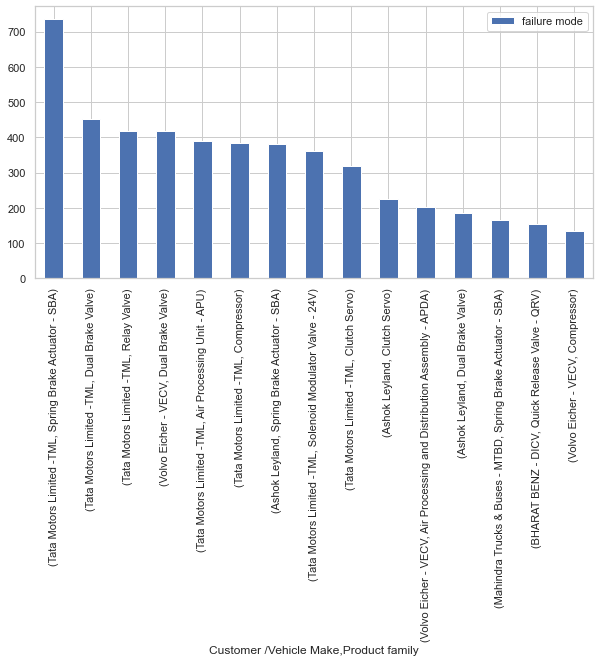

In [84]:
table1.nlargest(15, ['failure mode']).plot(kind='bar',figsize=(10,5))

fig.savefig("e.png") 

plt.show()

In [67]:
func = lambda x: 100*(x.count()/df.shape[0])
table2 = pd.pivot_table(df,index=['Product family'],values=['failure mode'], aggfunc=func )
table2

,failure mode
Product family,
ABS ECU - Electronic Control Unit,0.027988
Active Sensor,0.041982
Air Dryer,0.013994
Air Processing Unit - APU,7.038903
Air Processing and Distribution Assembly - APDA,3.008676
Air dryer,1.427372
Automatic Load Sensing Valve,0.111951
Automatic Slack Adjuster - ASA,0.181920
Brake Chamber,3.806325


<AxesSubplot:ylabel='Product family'>

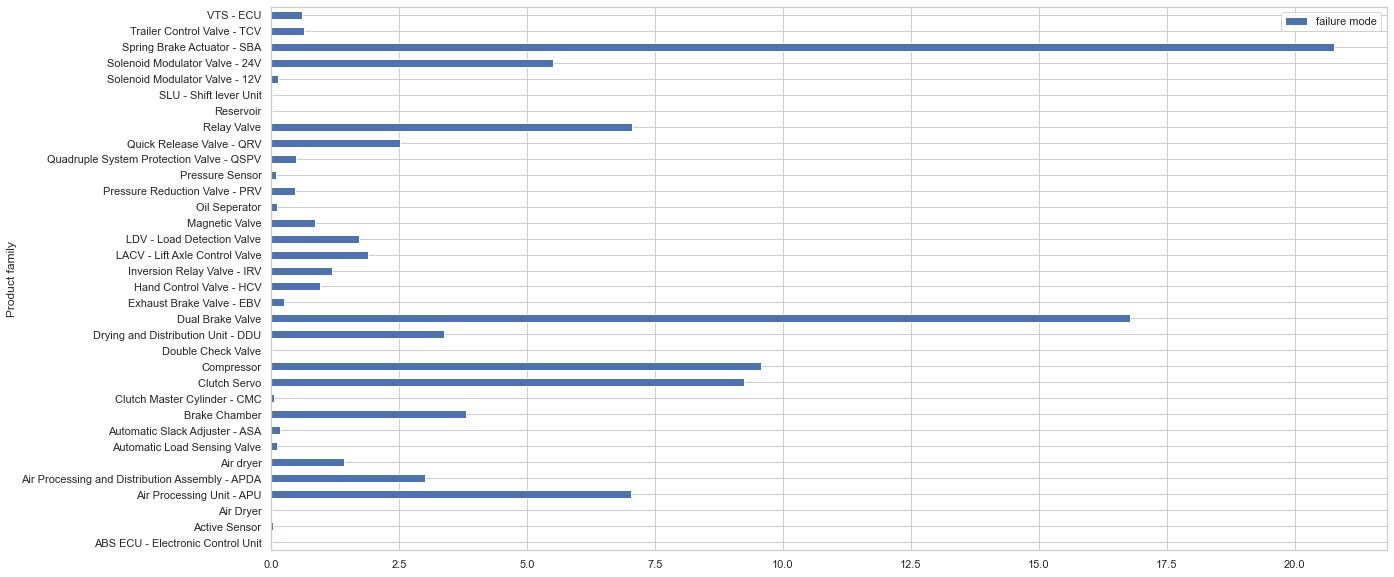

In [68]:
table2.plot(kind='barh',figsize=(20,10))

<AxesSubplot:xlabel='Product family'>

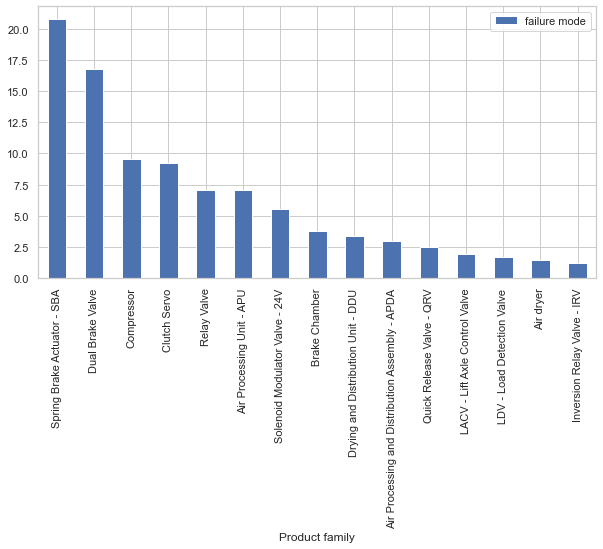

In [85]:
table2.nlargest(15, ['failure mode']).plot(kind='bar',figsize=(10,5))

In [90]:
table1 = pd.pivot_table(df,index=['Customer /Vehicle Make','Product family'],values=['Total Price'],
               aggfunc= np.sum)
table1

Total Price
Customer /Vehicle Make            Product family                                 
Action Construction Equipment Ltd Drying and Distribution Unit - DDU     5.502890
                                  Hand Control Valve - HCV               0.000000
                                  LACV - Lift Axle Control Valve         0.000000
                                  Spring Brake Actuator - SBA            4.401829
Ashok Leyland                     Air Processing Unit - APU            313.413744
...                                                                           ...
Volvo Eicher - VECV               Solenoid Modulator Valve - 12V         0.000000
                                  Solenoid Modulator Valve - 24V        11.266005
                                  Spring Brake Actuator - SBA          425.503451
                                  Trailer Control Valve - TCV            9.531174
                                  VTS - ECU                            146.458060

[137 rows x 1 columns]

<AxesSubplot:xlabel='Customer /Vehicle Make,Product family'>

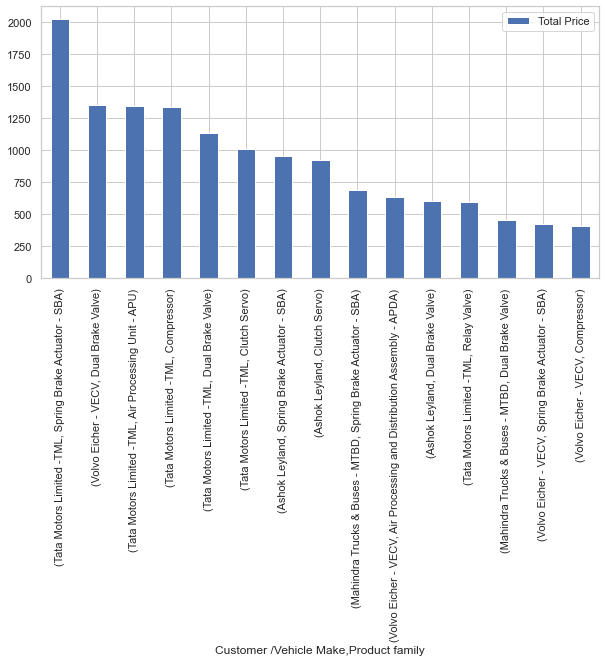

In [93]:
table1.nlargest(15, ['Total Price']).plot(kind='bar',figsize=(10,5))